In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
df= pd.read_excel('dfwavgscores.xlsx')

Rearrange order of columns -put asdage with other demographic    

**I want to get back all the asbg10 ones - they are useful** 
## I can use the differing demographic data to see if there is that affects experience in schools and reading scores. 
Should also compare reading scores with the benchmark and can also compare with previous years.
If I get data from different dates maybe I can practice the time/date stuff. change asbh02a to immigrant/ non - immigrant

## Demographic stuff

In [3]:
demographic_info_columns = ['Country', 'ASBH02A', 'ASBH02B', 'ASBH03A', 'ASBH04', 'ASBH15A', 'ASBH15B', 'ASBH16', 'ASBH17A', 'ASBH17B', 'ASBH18AA', 'ASBH18AB', 'ASBG01', 'ASBG03','MINAGEARRIVAL', 'rounded_ages','ASDAGE','avgscore']

In [4]:
df_demo = df[demographic_info_columns]

In [9]:
df_demo.head()

,Country,ASBH02A,ASBH02B,ASBH03A,ASBH04,ASBH15A,ASBH15B,ASBH16,ASBH17A,ASBH17B,ASBH18AA,ASBH18AB,ASBG01,ASBG03,MINAGEARRIVAL,rounded_ages,ASDAGE,avgscore
0,Turkey,Yes,6,Yes,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,10.17,555.811163
1,Turkey,Yes,6,Yes,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,9.42,558.507703
2,Turkey,Yes,6,Yes,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,9.50,563.484052
3,Turkey,Yes,6,Yes,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,9.58,581.597414
4,Turkey,Yes,6,Yes,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,9.58,559.048650


In [24]:
df_tail= df_demo.tail()

In [25]:
df_head = df_demo.head()

In [27]:
df_test = pd.concat([df_tail, df_head], axis=0)

In [28]:
df_test

,Country,ASBH02A,ASBH02B,ASBH03A,ASBH04,ASBH15A,ASBH15B,ASBH16,ASBH17A,ASBH17B,ASBH18AA,ASBH18AB,ASBG01,ASBG03,MINAGEARRIVAL,rounded_ages,ASDAGE,avgscore
41360,Sweden,Yes,NaN,Yes,1.0,4.0,4.0,2.0,6.0,11.0,1.0,1.0,1.0,1.0,NaN,11.0,10.92,561.208866
41361,Sweden,Yes,NaN,Yes,1.0,4.0,6.0,3.0,4.0,11.0,1.0,1.0,2.0,1.0,NaN,11.0,10.83,601.661762
41362,Sweden,Yes,NaN,Yes,1.0,7.0,7.0,6.0,NaN,NaN,1.0,1.0,2.0,1.0,NaN,11.0,10.75,595.823260
41363,Sweden,Yes,NaN,Yes,1.0,5.0,5.0,6.0,2.0,4.0,1.0,1.0,2.0,1.0,NaN,11.0,10.58,518.221252
41364,Sweden,Yes,NaN,Yes,1.0,7.0,5.0,4.0,NaN,11.0,1.0,1.0,2.0,1.0,NaN,10.0,10.50,429.279471
0,Turkey,Yes,6,Yes,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,10.17,555.811163
1,Turkey,Yes,6,Yes,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,9.42,558.507703
2,Turkey,Yes,6,Yes,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,9.50,563.484052
3,Turkey,Yes,6,Yes,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,9.58,581.597414
4,Turkey,Yes,6,Yes,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,9.58,559.048650


In [64]:
iran = df_demo[df_demo['Country']=='Iran']

In [55]:
pivot_langoftest = df_demo.pivot_table(values='avgscore', index=['Country','ASBH02A'],columns=['ASBH04'] )

In [56]:
pivot_langoftest

ASBH04                      1.0         2.0         3.0         4.0
Country     ASBH02A                                                
Austria     No       526.568683  499.076921  489.982926  518.437218
            Yes      548.440280  513.888546  477.016948  459.554538
Egypt       No       380.287685  359.878675  377.917497  263.399871
            Yes      381.613082  380.178017  382.486908  362.437696
France      No       511.447470  496.336046  458.852563  487.225042
            Yes      524.655744  505.915474  467.705766  496.661765
Jordan      No       384.344459  375.184140  380.041626  350.377802
            Yes      370.903979  356.796237  360.648001  325.172960
Netherlands No       538.941632  545.478924  491.142007  530.608261
            Yes      545.374390  545.130593  541.409542  556.160668
Sweden      No       545.221577  507.098497  501.383882  534.593889
            Yes      571.743100  541.003457  538.147637  541.857496

In [57]:
pivot_parentlevelofedu = df_demo.pivot_table(values='avgscore', index=['Country','ASBH02A'],columns=['ASBH15A','ASBH15B'] )

In [58]:
pivot_parentlevelofedu

ASBH15A                    1.0                                       \
ASBH15B                    1.0         2.0         3.0         4.0    
Country     ASBH02A                                                   
Austria     No       435.659564         NaN         NaN  528.195355   
            Yes      420.646031         NaN         NaN  408.735574   
Egypt       No       404.327629  296.456540         NaN  482.771890   
            Yes      343.547233  332.637388  341.394762  349.928624   
France      No       498.387656         NaN  368.374409         NaN   
            Yes      505.283577  591.382984         NaN  489.685435   
Jordan      No       336.795693  353.869954  411.155682  303.974172   
            Yes      299.282079  320.698007  319.931453  350.161576   
Netherlands No              NaN         NaN         NaN         NaN   
            Yes      525.952762         NaN         NaN         NaN   
Sweden      No       498.779777         NaN         NaN         NaN   
            Yes      475.466987         NaN         NaN  560.624655   

ASBH15A                                                              \
ASBH15B                    5.0         6.0         7.0         9.0    
Country     ASBH02A                                                   
Austria     No              NaN         NaN         NaN         NaN   
            Yes             NaN         NaN         NaN         NaN   
Egypt       No              NaN         NaN  372.002924         NaN   
            Yes      362.071663  275.321025         NaN  317.194583   
France      No              NaN         NaN         NaN         NaN   
            Yes             NaN         NaN  442.321528         NaN   
Jordan      No       468.744458         NaN  261.597630  370.530445   
            Yes      380.395070  362.018027  347.698645  334.524347   
Netherlands No              NaN  497.568294         NaN         NaN   
            Yes             NaN         NaN         NaN         NaN   
Sweden      No              NaN         NaN         NaN  349.611278   
            Yes             NaN         NaN         NaN         NaN   

ASBH15A                                2.0                           \
ASBH15B                    10.0        1.0         2.0         3.0    
Country     ASBH02A                                                   
Austria     No              NaN         NaN  484.186130  472.363134   
            Yes             NaN  591.224610  491.087455  474.696791   
Egypt       No              NaN         NaN         NaN         NaN   
            Yes      373.473437  340.340349  359.251851  355.051628   
France      No              NaN  415.984152  482.578884  543.540855   
            Yes             NaN  465.053132  475.471547  559.233620   
Jordan      No       479.301391  356.527073  345.672318  350.577212   
            Yes      277.618539  289.773675  308.076817  326.277388   
Netherlands No              NaN         NaN         NaN         NaN   
            Yes             NaN         NaN  462.156375  452.698908   
Sweden      No              NaN  594.196354  493.267757  505.379508   
            Yes             NaN  577.202528  518.817013  575.314595   

ASBH15A                                                              \
ASBH15B                    4.0         5.0         6.0         7.0    
Country     ASBH02A                                                   
Austria     No       389.176339         NaN         NaN         NaN   
            Yes      465.956626  542.575546  594.325635  441.959557   
Egypt       No       455.213302  347.536216  343.340501         NaN   
            Yes      364.825985  304.838652  336.854821  514.854116   
France      No       554.655328         NaN  543.676189         NaN   
            Yes      486.634570         NaN  510.463941         NaN   
Jordan      No       313.215371  293.284828  481.762655  418.547075   
            Yes      307.070362  318.749128  405.056936  397.888121   
Netherlands No       

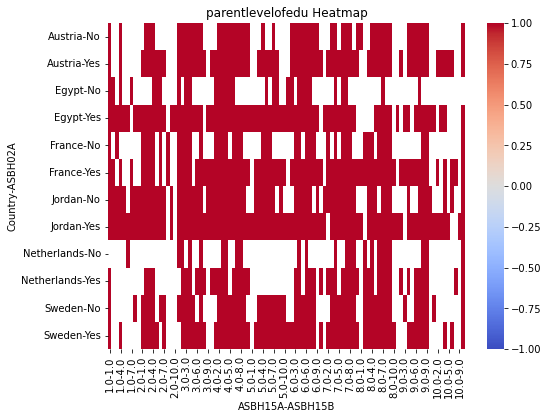

In [59]:
plt.figure(figsize=(8, 6))

# Create the heatmap
sns.heatmap(pivot_parentlevelofedu, annot=False, cmap='coolwarm', vmin=-1, vmax=1)

# Add a title
plt.title('parentlevelofedu Heatmap')

# Show the plot
plt.show()

I need to remove missing values for this stuff to actually be interesting. 

In [60]:
grouped = df_demo.groupby('Country')

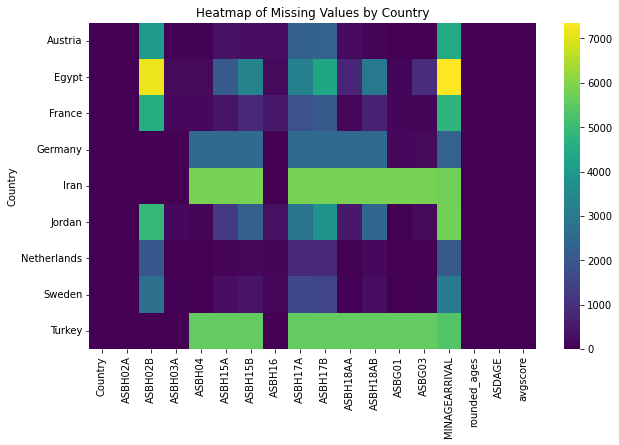

In [61]:
# Aggregate with isnull
missing_values = grouped.apply(lambda x: x.isnull().sum())

# Create the Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(missing_values, annot=False, cmap='viridis', cbar=True)
plt.title('Heatmap of Missing Values by Country')
plt.show()

In [65]:
iran['ASBH04'].value_counts()

Series([], Name: ASBH04, dtype: int64)

Ah I need to do the heatmap as percentage missing - seems all Iran is missing.

In [68]:
pivot_table_test = df_demo.pivot_table(
    index=['Country','ASBH02A'],
    aggfunc=lambda x: x.isnull().sum(),
)

In [70]:
# Calculate the total number of elements in each group
total_counts = df_demo.groupby(['Country','ASBH02A']).size()

# Calculate the percentage of missing values
percentage_missing = pivot_table_test.div(total_counts, axis=0) * 100

print("Pivot Table with Percentage of Missing Values:\n", percentage_missing)

Pivot Table with Percentage of Missing Values:
                          ASBG01      ASBG03     ASBH02B   ASBH03A      ASBH04  \
Country     ASBH02A                                                             
Austria     No         0.000000    0.886918    0.665188  2.439024    0.221729   
            Yes        0.149068    0.521739  100.000000  0.944099    0.993789   
Egypt       No         1.413428   13.780919   22.261484  9.540636    5.300353   
            Yes        1.286947   12.530052  100.000000  2.149625    2.531467   
France      No         2.479339    2.892562    6.611570  2.066116    2.479339   
            Yes        1.988511    2.121078  100.000000  3.689792    3.490941   
Germany     No        11.616162   12.121212    0.000000  0.000000  100.000000   
            Yes        6.344411    7.207596    0.000000  0.000000  100.000000   
Iran        No       100.000000  100.000000    0.000000  0.000000  100.000000   
            Yes      100.000000  100.000000    0.017483  0.00

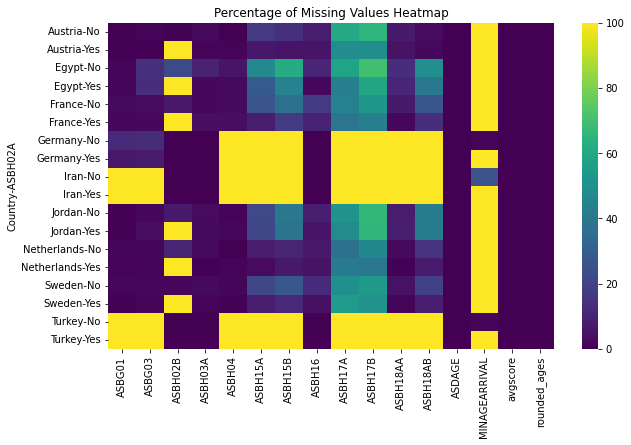

In [71]:
# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(percentage_missing, annot=False, cmap='viridis', fmt='.2f')

plt.title('Percentage of Missing Values Heatmap')
plt.show()

I also need to remove values that are '6', meaning nan.

In [62]:
df_demo['ASBH15A'].value_counts()

4.0     7199
7.0     3747
8.0     3086
6.0     2898
3.0     1883
5.0     1285
1.0     1009
2.0      959
9.0      727
10.0     212
Name: ASBH15A, dtype: int64

10 is not applicable - remove?

In [63]:
df_demo['ASBH15B'].value_counts()

4.0     6447
7.0     3019
8.0     2614
6.0     2570
3.0     1725
5.0     1163
1.0     1025
2.0      846
9.0      619
10.0     235
Name: ASBH15B, dtype: int64

In [ ]:
pivot = df_demo.pivot_table(values='avgscore', index=['Country','ASBH02A'],columns=['ASBH02B', 'ASBH03A', 'ASBH04', 'ASBH15A', 'ASBH15B', 'ASBH16', 'ASBH17A', 'ASBH17B', 'ASBH18AA', 'ASBH18AB', 'ASBG01', 'ASBG03','MINAGEARRIVAL', 'rounded_ages','ASDAGE'], aggfunc='mean')

In [40]:
correlation_matrix = df_demo.corr()

In [41]:
correlation_matrix.head()

,ASBH04,ASBH15A,ASBH15B,ASBH16,ASBH17A,ASBH17B,ASBH18AA,ASBH18AB,ASBG01,ASBG03,MINAGEARRIVAL,rounded_ages,ASDAGE,avgscore
ASBH04,1.000000,-0.092767,-0.082806,0.010692,-0.037367,-0.076498,0.336187,0.318718,-0.000221,0.358765,NaN,0.079512,0.085007,-0.123309
ASBH15A,-0.092767,1.000000,0.608891,0.362012,0.183307,0.158326,0.013418,-0.001788,0.005764,-0.041510,NaN,0.019014,0.010302,0.387454
ASBH15B,-0.082806,0.608891,1.000000,0.346306,0.120933,0.221049,0.004125,0.021573,-0.002438,-0.039212,NaN,0.001171,-0.005889,0.363702
ASBH16,0.010692,0.362012,0.346306,1.000000,0.064248,0.010046,0.035230,0.000409,-0.029053,0.029159,0.009991,-0.048932,-0.048847,0.160662
ASBH17A,-0.037367,0.183307,0.120933,0.064248,1.000000,0.330473,0.019892,0.001849,0.006282,-0.005542,NaN,0.025512,0.016197,0.102772


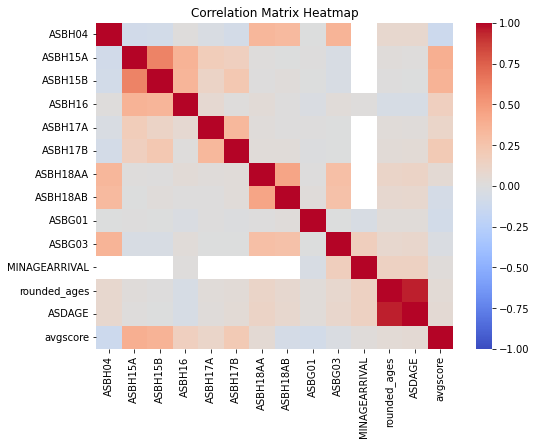

In [5]:
plt.figure(figsize=(8, 6))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)

# Add a title
plt.title('Correlation Matrix Heatmap')

# Show the plot
plt.show()

`ASBH02A	GEN\CHILD BORN IN <COUNTRY>\
ASBH02B	GEN\AGE OF CHILD WHEN CAME TO <COUNTRY>\
ASBH03A	GEN\LANGUAGE<LANGUAGE OF TEST>\
ASBH04	GEN\HOW OFTEN <LANG OF TEST> AT HOME\
ASBH15A	GEN\LVL OF EDUCATIONGUARDIAN A\
ASBH15B	GEN\LVL OF EDUCATIONGUARDIAN B\
ASBH16	GEN\LVL OF EDUCATIONCHILD\
ASBH17A	GEN\WHAT KIND OF MAIN JOB\GUARDIAN A\
ASBH17B	GEN\WHAT KIND OF MAIN JOB\GUARDIAN B\
ASBH18AA	GEN\LANGUAGE SPOKEN<LANGUAGE OF TEST>GUARDIAN A\
ASBH18AB	GEN\LANGUAGE SPOKEN<LANGUAGE OF TEST>GUARDIAN B\
ASBH18BA	GEN\LANGUAGE SPOKEN<COUNTRY-SPECIFIC>GUARDIAN A\
ASBH18BB	GEN\LANGUAGE SPOKEN<COUNTRY-SPECIFIC>GUARDIAN B`

With the above I just want to focus on the bottom row really - remove the rest? There is a light negative correlation between speaking the language of test at home and the average score. Also those whose parents have more education have performed better overall. However, we can only use numerical columns for a correlation matrix. For non-numerical columns we can try the methods below.

## Do I want a pivot table with all the demographic columns?

# Non-numeric

## The below is for comparing columns that are non-numeric. It might be worthwhile to hot-code!? these columns so that we can do .corr with them. Like the ones above. I also want to look at the ones above in more detail.

In [6]:
from scipy.stats import chi2_contingency

In [7]:
# Create a contingency table
contingency_table = pd.crosstab(df['ASBH02A'], df['avgscore'])

In [8]:
# Perform Chi-Square Test of Independence
chi2, p, dof, expected = chi2_contingency(contingency_table)

In [11]:
print(f"Chi-Square Test Statistic: {chi2}")
print(f"P-value: {p}")

Chi-Square Test Statistic: 41365.00000000001
P-value: 0.49630132644040176


## Interpretation

Chi-Square Test Statistic: 41365.00000000001
P-value: 0.49630132644040176

The P-value of approximately 0.496 suggests that there is a 49.6% chance of obtaining a Chi-Square Test Statistic of 41365 or higher under the assumption that the null hypothesis is true (i.e., there is no association between the variables). Since this P-value is much larger than 0.05, we do not have enough evidence to reject the null hypothesis.

Conclusion
There is no significant association between the variables in the contingency table. The high Chi-Square Test Statistic value seems unusual given the high P-value, which suggests that there might be an issue with the data or the way the test was performed. It might be useful to recheck the data or the contingency table to ensure there are no errors or anomalies.

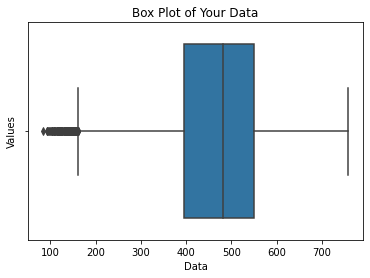

In [13]:
# Create a box plot
sns.boxplot(x=df['avgscore'])

# Add title and labels
plt.title('Box Plot of Your Data')
plt.xlabel('Data')
plt.ylabel('Values')

# Show the plot
plt.show()

Interpretation
Central Box: Represents the interquartile range (IQR), containing the middle 50% of the data.
Line inside the Box: Indicates the median of the data.
Whiskers: Extend to the smallest and largest values within 1.5 * IQR from the lower and upper quartiles.
Dots outside the Whiskers: Represent potential outliers.


## do a scatter plot\ ask chatgpt about regression and clustering

## want to do experiment with crosstab - adding more columns

I think my data is normally distributed because there is an obvious dip for specific countries but there are no crazy dips or heights that are not normal for the country. 

In [ ]:
import plotly.express as px

# Create a contingency table with the original data
contingency_table = pd.crosstab(df['ASBH02A'], df['avgscore'])

# Convert the contingency table to a format suitable for Plotly
contingency_table_reset = contingency_table.reset_index()
contingency_table_melted = contingency_table_reset.melt(id_vars='ASBH02A', var_name='avgscore', value_name='count')

# Plot the heatmap using Plotly
fig = px.density_heatmap(contingency_table_melted, x='ASBH02A', y='avgscore', z='count', color_continuous_scale='coolwarm')
fig.update_layout(title='Heatmap of Frequency Counts')
fig.show()

In [ ]:
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

# Create a confusion matrix
confusion_matrix = pd.crosstab(df['ASBH02A'], df['avgscore'])

# Calculate Cramér's V
cramers_v_value = cramers_v(confusion_matrix)
print(f"Cramér's V: {cramers_v_value}")

In [ ]:
# One-hot encode the categorical variables
df_encoded = pd.get_dummies(df)

# Calculate the correlation matrix
correlation_matrix = df_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap for Encoded Categorical Data')
plt.show()

In [ ]:
# Sample a subset of the data
df_sample = df.sample(n=10)  # Adjust the sample size as needed

# Create a contingency table with the sample
contingency_table = pd.crosstab(df_sample['ASBH02A'], df_sample['avgscore'])

# Plot the heatmap with the sample
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=False, cmap='coolwarm')
plt.title('Heatmap of Frequency Counts')
plt.show()